In [70]:
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
# Control the default size of figures in this Jupyter notebook
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 9)   # Change the size of plots

#references:

#https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/
#https://machinelearningmastery.com/time-series-forecasting-methods-in-python-cheat-sheet/
#Yahoo Finance

Populating the interactive namespace from numpy and matplotlib


In [71]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
data = pd.read_csv('AMZN.csv', parse_dates=['Date'], index_col='Date',date_parser=dateparse)
AC=data[['Adj Close']]
AC.head()

Adj Close
Date                  
2016-01-04  636.989990
2016-01-05  633.789978
2016-01-06  632.650024
2016-01-07  607.940002
2016-01-08  607.049988

In [72]:
data.head()


Open        High         Low       Close   Adj Close  \
Date                                                                     
2016-01-04  656.289978  657.719971  627.510010  636.989990  636.989990   
2016-01-05  646.859985  646.909973  627.650024  633.789978  633.789978   
2016-01-06  622.000000  639.789978  620.309998  632.650024  632.650024   
2016-01-07  621.799988  630.000000  605.210022  607.940002  607.940002   
2016-01-08  619.659973  624.140015  606.000000  607.049988  607.049988   

             Volume  
Date                 
2016-01-04  9314500  
2016-01-05  5822600  
2016-01-06  5329200  
2016-01-07  7074900  
2016-01-08  5512900

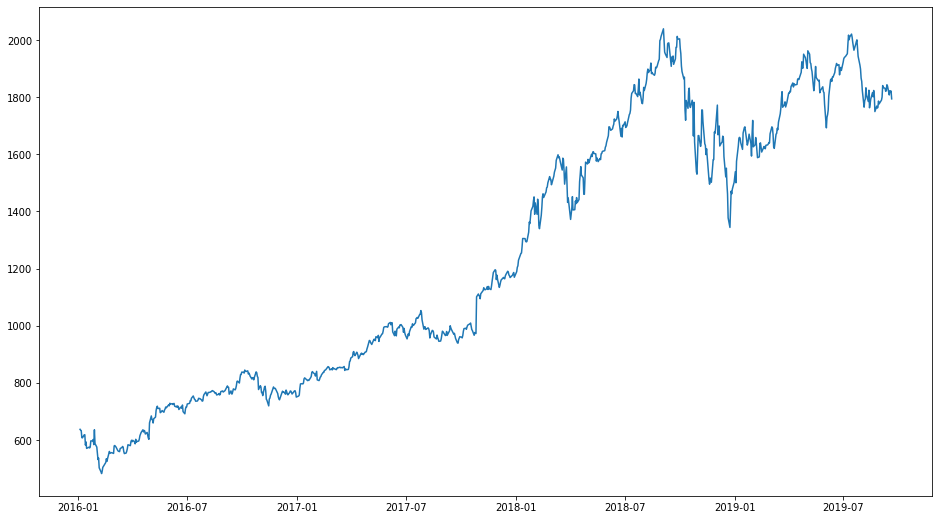

In [73]:
plt.figure(figsize=(16,9))

plt.plot(data['Adj Close'])

In [74]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=12).mean()
    rolstd =  timeseries.rolling(window=12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

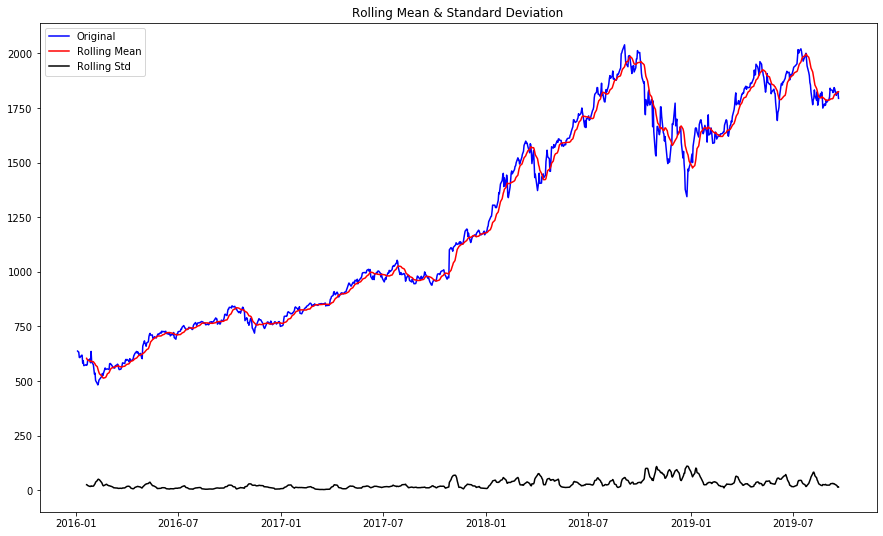

Results of Dickey-Fuller Test:
Test Statistic                  -0.862665
p-value                          0.800019
#Lags Used                       0.000000
Number of Observations Used    935.000000
Critical Value (1%)             -3.437363
Critical Value (5%)             -2.864636
Critical Value (10%)            -2.568419
dtype: float64


In [75]:

test_stationarity(data['Adj Close'])

(<Figure size 1080x648 with 4 Axes>,)

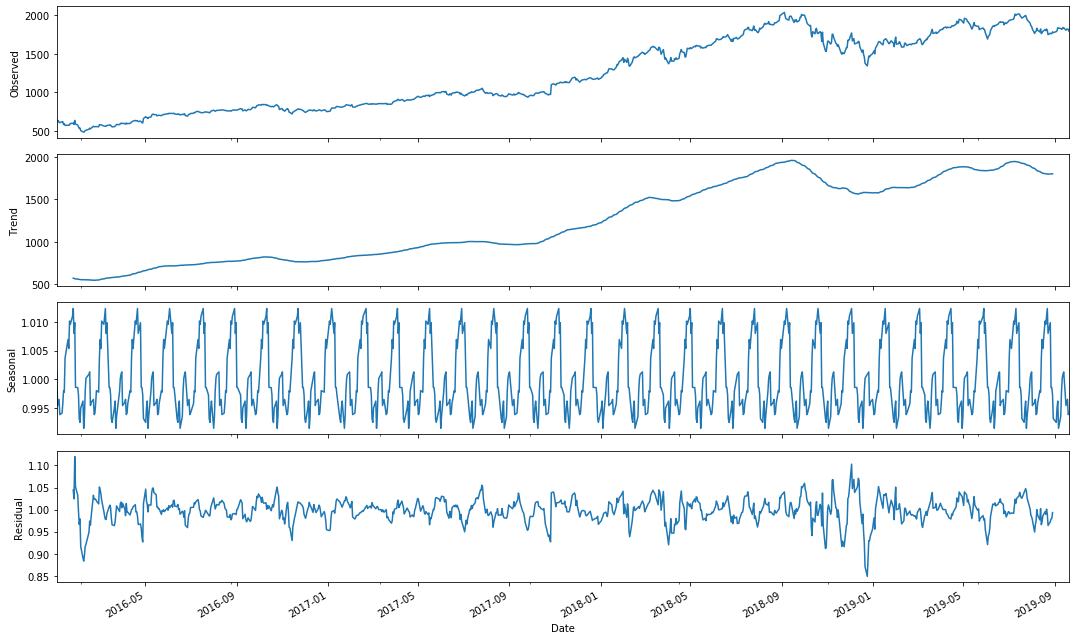

In [76]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(AC, freq=30, model='multiplicative')  
result.plot(),

In [77]:
AC['EWM30']=AC['Adj Close'].ewm(span=30).mean()

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


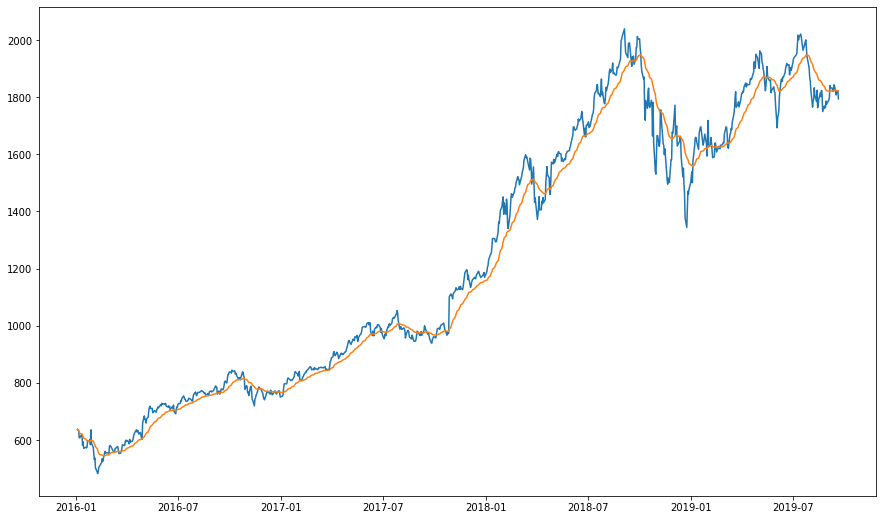

In [78]:
plt.plot(AC['Adj Close'])
plt.plot(AC['EWM30'])

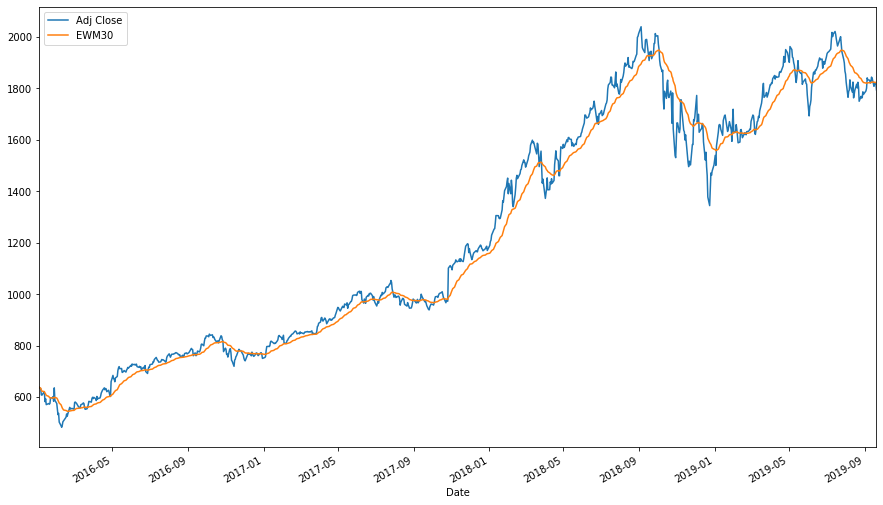

In [79]:
AC[['Adj Close', 'EWM30']].plot()

In [80]:
AC.index

DatetimeIndex(['2016-01-04', '2016-01-05', '2016-01-06', '2016-01-07',
               '2016-01-08', '2016-01-11', '2016-01-12', '2016-01-13',
               '2016-01-14', '2016-01-15',
               ...
               '2019-09-09', '2019-09-10', '2019-09-11', '2019-09-12',
               '2019-09-13', '2019-09-16', '2019-09-17', '2019-09-18',
               '2019-09-19', '2019-09-20'],
              dtype='datetime64[ns]', name='Date', length=936, freq=None)

In [81]:
AC['year']=AC.index.year

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [82]:
AC['month']=AC.index.month

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [83]:
AC_Year_Month=pd.DataFrame(AC.groupby(['year', 'month'])['Adj Close'].max())

In [84]:
AC_Year_Month=AC_Year_Month.reset_index()

In [85]:
AC_Year_Month

year  month    Adj Close
0   2016      1   636.989990
1   2016      2   574.809998
2   2016      3   598.690002
3   2016      4   659.590027
4   2016      5   722.789978
5   2016      6   728.239990
6   2016      7   758.809998
7   2016      8   772.559998
8   2016      9   837.309998
9   2016     10   844.359985
10  2016     11   787.750000
11  2016     12   774.340027
12  2017      1   839.150024
13  2017      2   856.440002
14  2017      3   886.539978
15  2017      4   924.989990
16  2017      5   996.700012
17  2017      6  1011.340027
18  2017      7  1052.800049
19  2017      8   996.190002
20  2017      9   999.599976
21  2017     10  1110.849976
22  2017     11  1195.829956
23  2017     12  1190.579956
24  2018      1  1450.890015
25  2018      2  1521.949951
26  2018      3  1598.390015
27  2018      4  1572.619995
28  2018      5  1629.619995
29  2018      6  1750.079956
30  2018      7  1863.609985
31  2018      8  2012.709961
32  2018      9  2039.510010
33  2018     10  2004.359985
34  2018     11  1755.489990
35  2018     12  1772.359985
36  2019      1  1718.729980
37  2019      2  1658.810059
38  2019      3  1819.260010
39  2019      4  1950.630005
40  2019      5  1962.459961
41  2019      6  1918.189941
42  2019      7  2020.989990
43  2019      8  1855.319946
44  2019      9  1843.550049

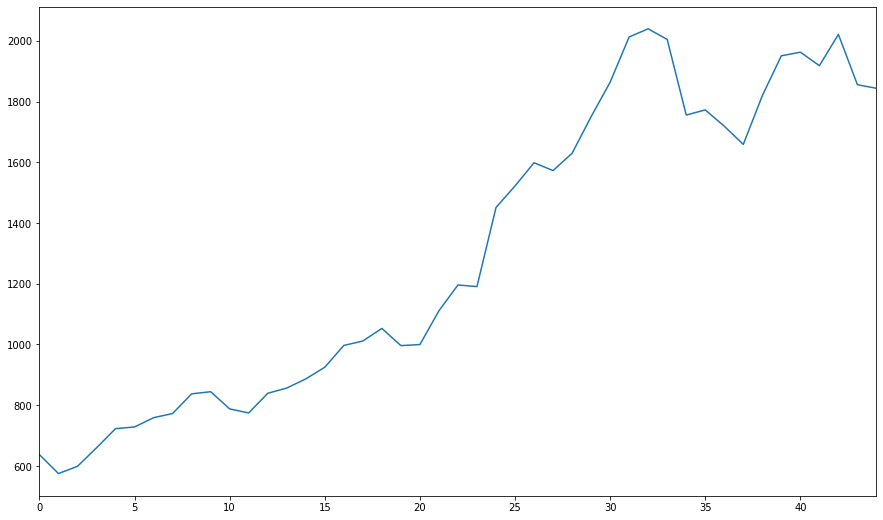

In [86]:
AC_Year_Month['Adj Close'].plot()

In [87]:
AC_Year_Month['pct_change']=AC_Year_Month['Adj Close'].pct_change()

[]

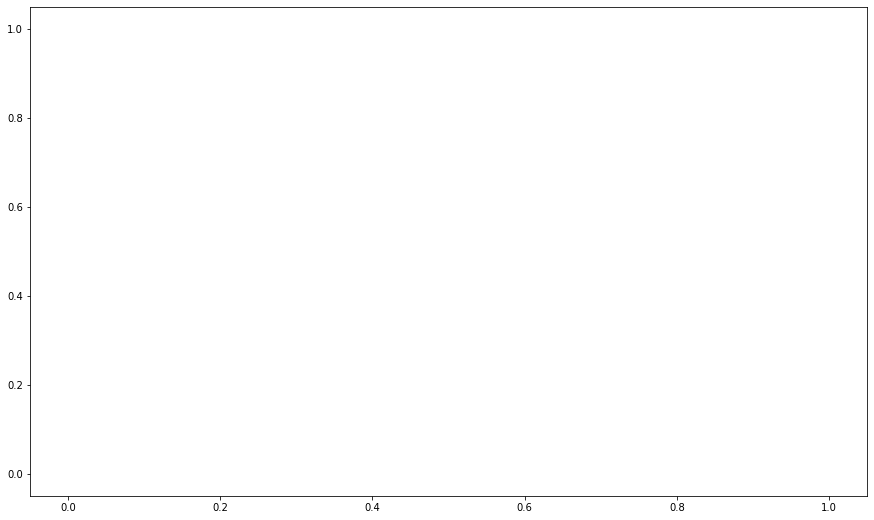

In [88]:
plt.plot()

In [89]:
AC_Year_Month.sort_values(by='pct_change', ascending=False)

year  month    Adj Close  pct_change
24  2018      1  1450.890015    0.218641
21  2017     10  1110.849976    0.111295
3   2016      4   659.590027    0.101722
38  2019      3  1819.260010    0.096726
4   2016      5   722.789978    0.095817
8   2016      9   837.309998    0.083812
12  2017      1   839.150024    0.083697
31  2018      8  2012.709961    0.080006
16  2017      5   996.700012    0.077525
22  2017     11  1195.829956    0.076500
29  2018      6  1750.079956    0.073919
39  2019      4  1950.630005    0.072211
30  2018      7  1863.609985    0.064871
42  2019      7  2020.989990    0.053592
26  2018      3  1598.390015    0.050225
25  2018      2  1521.949951    0.048977
15  2017      4   924.989990    0.043371
6   2016      7   758.809998    0.041978
2   2016      3   598.690002    0.041544
18  2017      7  1052.800049    0.040995
28  2018      5  1629.619995    0.036245
14  2017      3   886.539978    0.035145
13  2017      2   856.440002    0.020604
7   2016      8   772.559998    0.018120
17  2017      6  1011.340027    0.014688
32  2018      9  2039.510010    0.013315
35  2018     12  1772.359985    0.009610
9   2016     10   844.359985    0.008420
5   2016      6   728.239990    0.007540
40  2019      5  1962.459961    0.006065
20  2017      9   999.599976    0.003423
23  2017     12  1190.579956   -0.004390
44  2019      9  1843.550049   -0.006344
27  2018      4  1572.619995   -0.016122
11  2016     12   774.340027   -0.017023
33  2018     10  2004.359985   -0.017235
41  2019      6  1918.189941   -0.022558
36  2019      1  1718.729980   -0.030259
37  2019      2  1658.810059   -0.034863
19  2017      8   996.190002   -0.053771
10  2016     11   787.750000   -0.067045
43  2019      8  1855.319946   -0.081975
1   2016      2   574.809998   -0.097615
34  2018     11  1755.489990   -0.124164
0   2016      1   636.989990         NaN

# Making the series Stationary

In [90]:
#log transformation to reduce trend

In [91]:
AC['log_Adj_Close']=np.log(AC['Adj Close'])


//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


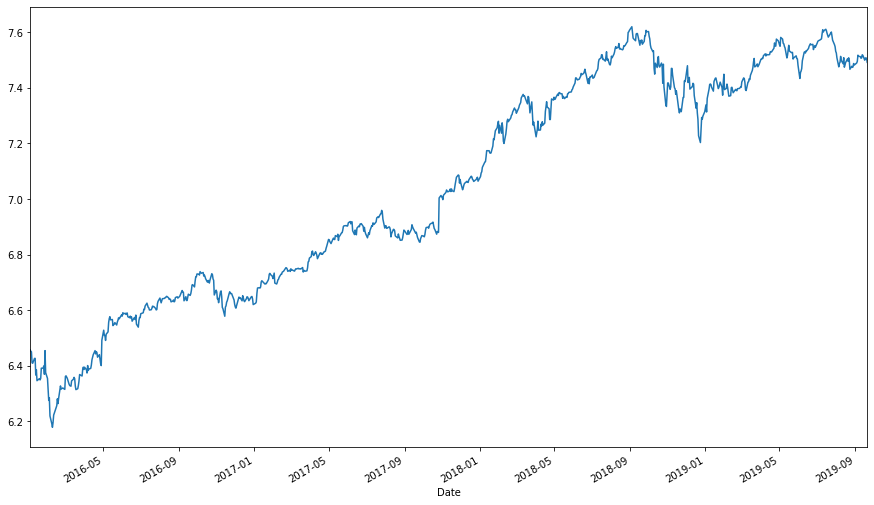

In [92]:
AC['log_Adj_Close'].plot()

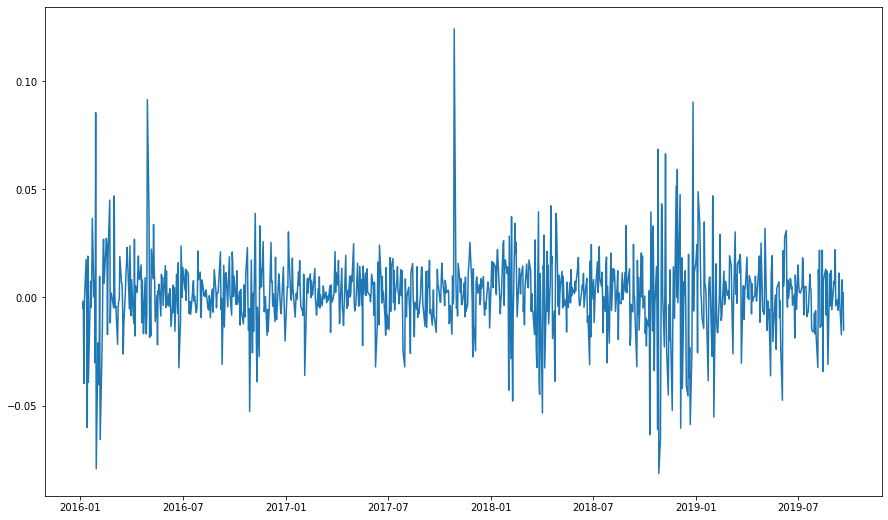

In [93]:
AC['log_dif'] = AC['log_Adj_Close'] - AC['log_Adj_Close'].shift()
plt.plot(AC['log_dif'])

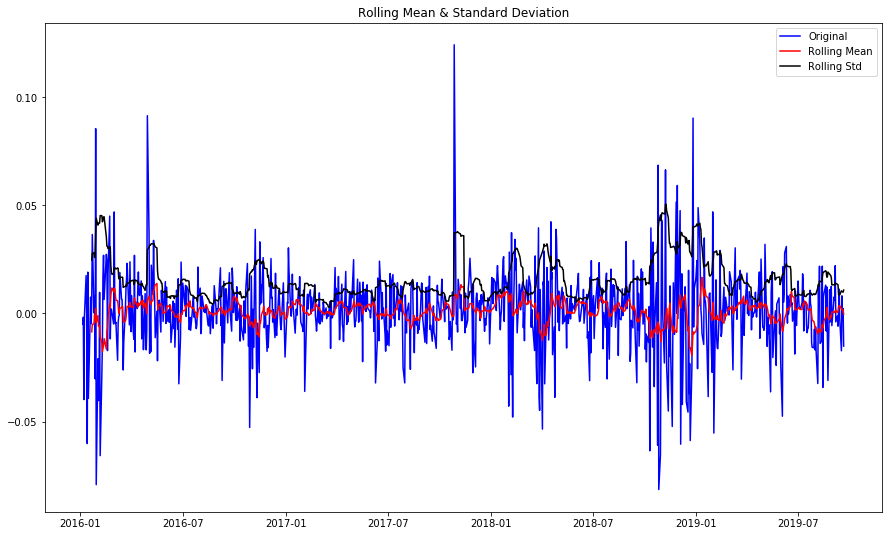

Results of Dickey-Fuller Test:
Test Statistic                 -30.966712
p-value                          0.000000
#Lags Used                       0.000000
Number of Observations Used    934.000000
Critical Value (1%)             -3.437371
Critical Value (5%)             -2.864639
Critical Value (10%)            -2.568420
dtype: float64


In [94]:
AC.dropna(inplace=True)

test_stationarity(AC['log_dif'])

The DF test statistic is significantly lower that the 1% critical value. the diff.shift transformation transformed got rid of the trend and seasonality,

# Predictions

#determine p and q parameters of the ARIMA model using PACF and ACF

In [95]:
from statsmodels.tsa.stattools import acf, pacf

In [98]:
lag_acf = acf(AC['log_dif'], nlags=20)
lag_pacf = pacf(AC['log_dif'], nlags=20, method='ols')

//anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Autocorrelation Function')

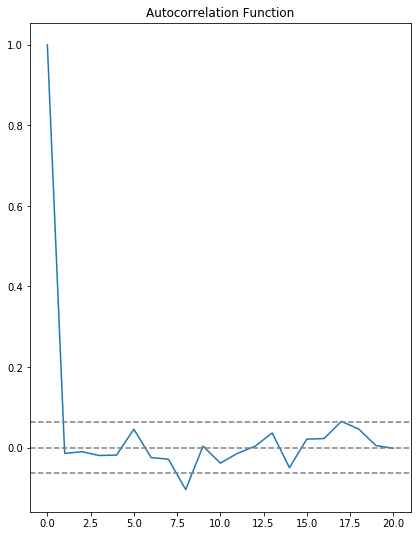

In [102]:
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(AC['log_dif'])),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(AC['log_dif'])),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

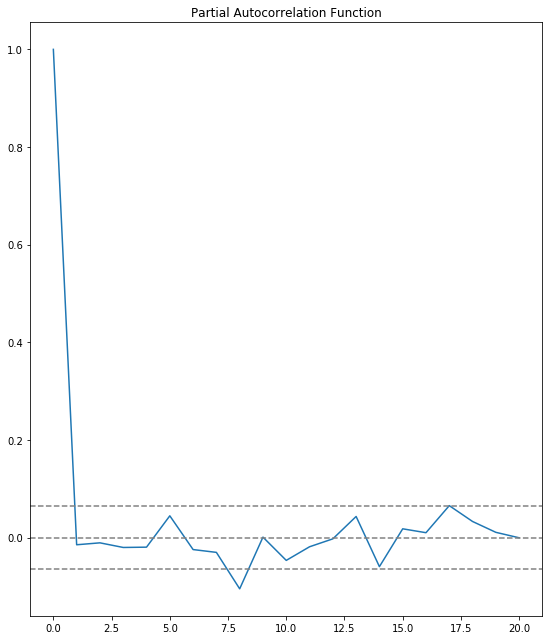

In [103]:
#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(AC['log_dif'])),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(AC['log_dif'])),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

p – The lag value where the PACF chart crosses the upper confidence interval for the first time.  in this case p=1.
q – The lag value where the ACF chart crosses the upper confidence interval for the first time. in this case q=1

# ARIMA 

In [105]:
from statsmodels.tsa.arima_model import ARIMA

//anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
//anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Text(0.5, 1.0, 'RSS: 0.2995')

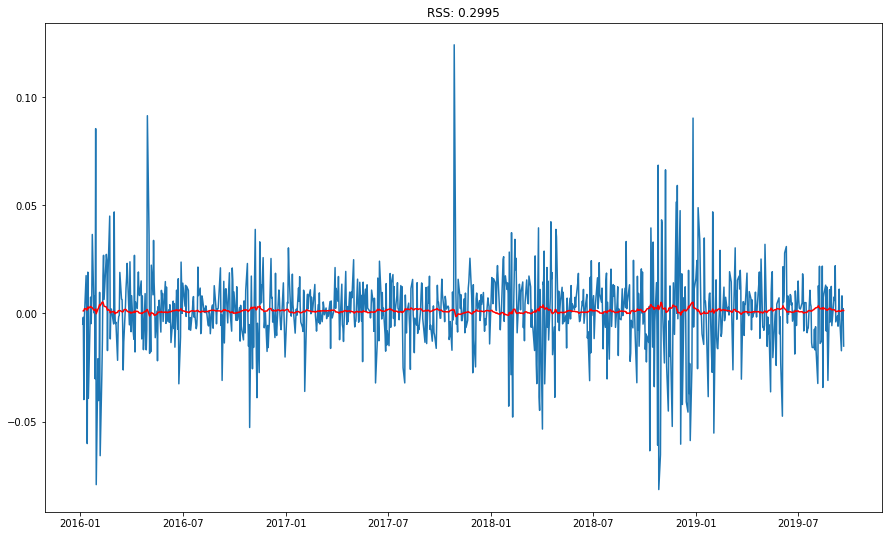

In [112]:
model = ARIMA(AC['log_Adj_Close'], order=(1, 1, 1))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(AC['log_dif'])

plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-AC['log_dif'])**2))